In [ ]:
import scipy.io as sio
import os
import re
import numpy as np
import pandas as pd
from PIL import Image
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FFMpegWriter
plt.rcParams['animation.ffmpeg_path'] ='C:\\ffmpeg-4.1-win64-static\\bin\\ffmpeg.exe'
%matplotlib notebook


In [ ]:
# helper function
def search_int_in_filename(filename):
    num_search = re.search('\d+',filename)
    return int(num_search.group(0))


folder_path = 'D:\Data\Wi_Fi Dataset\Wi-Fi dataset_CSI\\'
folder_list = os.listdir(folder_path)


In [ ]:
exp_id = folder_list[0]

In [ ]:
    file_path = folder_path + exp_id
    file_list = os.listdir(file_path)
    file_list.sort(key=search_int_in_filename)
        
    df_sc = pd.DataFrame()
    dict_csi = {}
    list_scaled = []
    scalar_colname = ['timestamp_low','bfee_count','Nrx','Ntx','rssi_a','rssi_b','rssi_c','noise','agc','rate']
    for i, file in enumerate(file_list):
        data_read = sio.loadmat(os.path.join(file_path,file))
        num_search = re.search('\d+',file)
        csi_num = int(num_search.group(0))

        # scalar data
        read_sc0_8 = [data_read['csi_entry'][0][0][a][0][0] for a in range(9)]
        data_sc = pd.DataFrame(read_sc0_8).astype('int').T
        data_sc.columns=scalar_colname[0:9]
        data_sc['perm'] = pd.Series([data_read['csi_entry'][0][0][9][0]])
        data_sc['rate'] = data_read['csi_entry'][0][0][10][0][0]
        data_sc.index = [(exp_id,csi_num)]

        # csi info
        csi_raw = data_read['csi_entry'][0][0][11]
        csi_scaled = data_read['csi_entry'][0][0][12]
        list_scaled.append(csi_scaled)

        # aggregate
        df_sc = df_sc.append(data_sc)
#        arr_scaled = np.append(arr_scaled, [csi_scaled], axis=0)
        dict_csi[csi_num] = csi_raw,csi_scaled

In [ ]:
len(list_scaled)

In [ ]:
aa = np.array(list_scaled)

In [ ]:
df_subc = pd.DataFrame()
dict_scaled = {}

In [ ]:
folder_list[1:10]

In [ ]:
for exp_id in folder_list[1:3]: # test
    file_path = folder_path + exp_id
    file_list = os.listdir(file_path)
    file_list.sort(key=search_int_in_filename)
        
    df_sc = pd.DataFrame()
    list_scaled = []
    scalar_colname = ['timestamp_low','bfee_count','Nrx','Ntx','rssi_a','rssi_b','rssi_c','noise','agc','rate']
    for i, file in enumerate(file_list):
        data_read = sio.loadmat(os.path.join(file_path,file))
        num_search = re.search('\d+',file)
        csi_num = int(num_search.group(0))

        # scalar data
        read_sc0_8 = [data_read['csi_entry'][0][0][a][0][0] for a in range(9)]
        data_sc = pd.DataFrame(read_sc0_8).astype('int').T
        data_sc.columns=scalar_colname[0:9]
        data_sc['perm'] = pd.Series([data_read['csi_entry'][0][0][9][0]])
        data_sc['rate'] = data_read['csi_entry'][0][0][10][0][0]
        data_sc.index = [(exp_id,csi_num)]

        # csi info
        csi_raw = data_read['csi_entry'][0][0][11]
        csi_scaled = data_read['csi_entry'][0][0][12]

        # aggregate
        df_sc = df_sc.append(data_sc)
        list_scaled.append(csi_scaled)

    arr_scaled = np.array(list_scaled)
    dict_scaled[exp_id] = arr_scaled
    

In [ ]:
dict_scaled.keys()

In [ ]:
dict_scaled['S001_1_1_10'].shape

In [ ]:
import pickle
import gzip
with gzip.open('data_gz.pickle', 'wb') as f:
    pickle.dump(dict_scaled, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
np.save('data_np.npy', dict_scaled) 

In [ ]:
dict_scaled.keys()

In [ ]:
    with gzip.open(exp_id+'.pickle', 'wb') as f:
        pickle.dump(arr_scaled, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
arr_scaled.shape

In [ ]:
a = arr_scaled[0]

In [ ]:
a.shape

In [ ]:
a[0][0]

In [ ]:
aa = a.reshape(-1,2,3)
aa.shape

In [ ]:
a[:][0][0]

In [ ]:
for exp_id in folder_list[1:3]: # test
    file_path = folder_path + exp_id
    file_list = os.listdir(file_path)
    file_list.sort(key=search_int_in_filename)
        
    df_sc = pd.DataFrame()
    list_scaled = []
    scalar_colname = ['timestamp_low','bfee_count','Nrx','Ntx','rssi_a','rssi_b','rssi_c','noise','agc','rate']
    for i, file in enumerate(file_list):
        data_read = sio.loadmat(os.path.join(file_path,file))
        num_search = re.search('\d+',file)
        csi_num = int(num_search.group(0))

        # scalar data
        read_sc0_8 = [data_read['csi_entry'][0][0][a][0][0] for a in range(9)]
        data_sc = pd.DataFrame(read_sc0_8).astype('int').T
        data_sc.columns=scalar_colname[0:9]
        data_sc['perm'] = pd.Series([data_read['csi_entry'][0][0][9][0]])
        data_sc['rate'] = data_read['csi_entry'][0][0][10][0][0]
        data_sc.index = [(exp_id,csi_num)]

        # csi info
        csi_raw = data_read['csi_entry'][0][0][11]
        csi_scaled = data_read['csi_entry'][0][0][12]

        # aggregate
        df_sc = df_sc.append(data_sc)
        list_scaled.append(csi_scaled)

    arr_scaled = np.array(list_scaled).reshape(-1,30,2,3)
    dict_scaled[exp_id] = arr_scaled

In [ ]:
arr_scaled.shape

In [ ]:
    #Draw Graph
    fig = plt.figure()
    ax00 = fig.add_subplot(221)
    ax01 = fig.add_subplot(222)
    ax10 = fig.add_subplot(223)
    ax11 = fig.add_subplot(224)

    fig.suptitle('Animated plot of : '+exp_id)
    ax00.set_title('Receiver1')
    ax01.set_title('Receiver2')
    ax00.set_ylabel('Abs')
    ax10.set_ylabel('Phase')
    ax10.set_xlabel('Subcarrier')
    ax11.set_xlabel('Subcarrier')

    ax00.set_ylim(0,50)
    ax01.set_ylim(0,50)

    x = np.arange(0,30)
    line000, = ax00.plot(x,np.abs(arr_scaled[1][:][0][0]))
    line001, = ax00.plot(x,np.abs(arr_scaled[1][:][0][1]))
    line002, = ax00.plot(x,np.abs(arr_scaled[1][:][0][2]))
    line010, = ax01.plot(x,np.abs(arr_scaled[1][:][1][0]))
    line011, = ax01.plot(x,np.abs(arr_scaled[1][:][1][1]))
    line012, = ax01.plot(x,np.abs(arr_scaled[1][:][1][2]))
    line100, = ax10.plot(x,np.angle(arr_scaled[1][:][0][0]))
    line101, = ax10.plot(x,np.angle(arr_scaled[1][:][0][1]))
    line102, = ax10.plot(x,np.angle(arr_scaled[1][:][0][2]))
    line110, = ax11.plot(x,np.angle(arr_scaled[1][:][1][0]))
    line111, = ax11.plot(x,np.angle(arr_scaled[1][:][1][1]))
    line112, = ax11.plot(x,np.angle(arr_scaled[1][:][1][2]))

    def init():  # only required for blitting to give a clean slate.
        line000.set_ydata([np.nan] * len(x))
        line001.set_ydata([np.nan] * len(x))
        line002.set_ydata([np.nan] * len(x))
        line010.set_ydata([np.nan] * len(x))
        line011.set_ydata([np.nan] * len(x))
        line012.set_ydata([np.nan] * len(x))
        line100.set_ydata([np.nan] * len(x))
        line101.set_ydata([np.nan] * len(x))
        line102.set_ydata([np.nan] * len(x))
        line110.set_ydata([np.nan] * len(x))
        line111.set_ydata([np.nan] * len(x))
        line112.set_ydata([np.nan] * len(x))
        return [line000,line001,line002,line010,line011,line012,line100,line101,line102,line110,line111,line112],

    def animate(i):
        line000.set_ydata(np.abs(arr_scaled[i][:][0][0]))  # update the data.
        line001.set_ydata(np.abs(arr_scaled[i][:][0][1]))
        line002.set_ydata(np.abs(arr_scaled[i][:][0][2]))
        line010.set_ydata(np.abs(arr_scaled[i][:][1][0]))  # update the data.
        line011.set_ydata(np.abs(arr_scaled[i][:][1][1]))
        line012.set_ydata(np.abs(arr_scaled[i][:][1][2]))    
        line100.set_ydata(np.angle(arr_scaled[i][:][0][0]))  # update the data.
        line101.set_ydata(np.angle(arr_scaled[i][:][0][1]))
        line102.set_ydata(np.angle(arr_scaled[i][:][0][2]))
        line110.set_ydata(np.angle(arr_scaled[i][:][1][0]))  # update the data.
        line111.set_ydata(np.angle(arr_scaled[i][:][1][1]))
        line112.set_ydata(np.angle(arr_scaled[i][:][1][2]))    
        return [line000,line001,line002,line010,line011,line012,line100,line101,line102,line110,line111,line112],


    ani = animation.FuncAnimation(
        fig, animate, init_func=init,interval=1,blit=True, save_count=100,repeat=False)


In [ ]:
arr_scaled[1][:][0][0].shape

In [ ]:
arr_scaled.shape

In [ ]:
arr_scaled[0][:][0][0].shape

In [ ]:
arr_scaled[0,:,0,0].shape

In [ ]:
    #Draw Graph
    fig = plt.figure()
    ax00 = fig.add_subplot(221)
    ax01 = fig.add_subplot(222)
    ax10 = fig.add_subplot(223)
    ax11 = fig.add_subplot(224)

    fig.suptitle('Animated plot of : '+exp_id)
    ax00.set_title('Receiver1')
    ax01.set_title('Receiver2')
    ax00.set_ylabel('Abs')
    ax10.set_ylabel('Phase')
    ax10.set_xlabel('Subcarrier')
    ax11.set_xlabel('Subcarrier')

    ax00.set_ylim(0,50)
    ax01.set_ylim(0,50)

    x = np.arange(0,30)
    line000, = ax00.plot(x,np.abs(arr_scaled[1,:,0,0]))
    line001, = ax00.plot(x,np.abs(arr_scaled[1,:,0,1]))
    line002, = ax00.plot(x,np.abs(arr_scaled[1,:,0,2]))
    line010, = ax01.plot(x,np.abs(arr_scaled[1,:,1,0]))
    line011, = ax01.plot(x,np.abs(arr_scaled[1,:,1,1]))
    line012, = ax01.plot(x,np.abs(arr_scaled[1,:,1,2]))
    line100, = ax10.plot(x,np.angle(arr_scaled[1,:,0,0]))
    line101, = ax10.plot(x,np.angle(arr_scaled[1,:,0,1]))
    line102, = ax10.plot(x,np.angle(arr_scaled[1,:,0,2]))
    line110, = ax11.plot(x,np.angle(arr_scaled[1,:,1,0]))
    line111, = ax11.plot(x,np.angle(arr_scaled[1,:,1,1]))
    line112, = ax11.plot(x,np.angle(arr_scaled[1,:,1,2]))

    def init():  # only required for blitting to give a clean slate.
        line000.set_ydata([np.nan] * len(x))
        line001.set_ydata([np.nan] * len(x))
        line002.set_ydata([np.nan] * len(x))
        line010.set_ydata([np.nan] * len(x))
        line011.set_ydata([np.nan] * len(x))
        line012.set_ydata([np.nan] * len(x))
        line100.set_ydata([np.nan] * len(x))
        line101.set_ydata([np.nan] * len(x))
        line102.set_ydata([np.nan] * len(x))
        line110.set_ydata([np.nan] * len(x))
        line111.set_ydata([np.nan] * len(x))
        line112.set_ydata([np.nan] * len(x))
        return [line000,line001,line002,line010,line011,line012,line100,line101,line102,line110,line111,line112],

    def animate(i):
        line000.set_ydata(np.abs(arr_scaled[i,:,0,0]))  # update the data.
        line001.set_ydata(np.abs(arr_scaled[i,:,0,1]))
        line002.set_ydata(np.abs(arr_scaled[i,:,0,2]))
        line010.set_ydata(np.abs(arr_scaled[i,:,1,0]))  # update the data.
        line011.set_ydata(np.abs(arr_scaled[i,:,1,1]))
        line012.set_ydata(np.abs(arr_scaled[i,:,1,2]))    
        line100.set_ydata(np.angle(arr_scaled[i,:,0,0]))  # update the data.
        line101.set_ydata(np.angle(arr_scaled[i,:,0,1]))
        line102.set_ydata(np.angle(arr_scaled[i,:,0,2]))
        line110.set_ydata(np.angle(arr_scaled[i,:,1,0]))  # update the data.
        line111.set_ydata(np.angle(arr_scaled[i,:,1,1]))
        line112.set_ydata(np.angle(arr_scaled[i,:,1,2]))    
        return [line000,line001,line002,line010,line011,line012,line100,line101,line102,line110,line111,line112],
    FFwriter = animation.FFMpegWriter(fps=30, extra_args=['-vcodec', 'libx264'])
    ani.save(exp_id+'_ani.mp4', writer = FFwriter)

#    ani = animation.FuncAnimation(
#        fig, animate, init_func=init,interval=1,blit=True, save_count=100,repeat=False)


In [ ]:
line000, = ax00.plot(x,np.abs(arr_scaled[1,:,0,0]))

In [ ]:
line000
fig.show()

In [ ]:
%matplotlib notebook


In [ ]:
ani.show()

In [ ]:
def plot_animated(exp_id,arr_scaled):
    #Draw Graph
    fig = plt.figure()
    ax00 = fig.add_subplot(221)
    ax01 = fig.add_subplot(222)
    ax10 = fig.add_subplot(223)
    ax11 = fig.add_subplot(224)

    fig.suptitle('Animated plot of : '+exp_id)
    ax00.set_title('Antenna1')
    ax01.set_title('Antenna2')
    ax00.set_ylabel('Abs')
    ax10.set_ylabel('Phase')
    ax10.set_xlabel('Subcarrier')
    ax11.set_xlabel('Subcarrier')

    ax00.set_ylim(0,50)
    ax01.set_ylim(0,50)

    x = np.arange(0,30)
    line000, = ax00.plot(x,np.abs(arr_scaled[1,:,0,0]))
    line001, = ax00.plot(x,np.abs(arr_scaled[1,:,0,1]))
    line002, = ax00.plot(x,np.abs(arr_scaled[1,:,0,2]))
    line010, = ax01.plot(x,np.abs(arr_scaled[1,:,1,0]))
    line011, = ax01.plot(x,np.abs(arr_scaled[1,:,1,1]))
    line012, = ax01.plot(x,np.abs(arr_scaled[1,:,1,2]))
    line100, = ax10.plot(x,np.angle(arr_scaled[1,:,0,0]))
    line101, = ax10.plot(x,np.angle(arr_scaled[1,:,0,1]))
    line102, = ax10.plot(x,np.angle(arr_scaled[1,:,0,2]))
    line110, = ax11.plot(x,np.angle(arr_scaled[1,:,1,0]))
    line111, = ax11.plot(x,np.angle(arr_scaled[1,:,1,1]))
    line112, = ax11.plot(x,np.angle(arr_scaled[1,:,1,2]))

    def init():  # only required for blitting to give a clean slate.
        line000.set_ydata([np.nan] * len(x))
        line001.set_ydata([np.nan] * len(x))
        line002.set_ydata([np.nan] * len(x))
        line010.set_ydata([np.nan] * len(x))
        line011.set_ydata([np.nan] * len(x))
        line012.set_ydata([np.nan] * len(x))
        line100.set_ydata([np.nan] * len(x))
        line101.set_ydata([np.nan] * len(x))
        line102.set_ydata([np.nan] * len(x))
        line110.set_ydata([np.nan] * len(x))
        line111.set_ydata([np.nan] * len(x))
        line112.set_ydata([np.nan] * len(x))
        return [line000,line001,line002,line010,line011,line012,line100,line101,line102,line110,line111,line112],

    def animate(i):
        line000.set_ydata(np.abs(arr_scaled[i,:,0,0]))  # update the data.
        line001.set_ydata(np.abs(arr_scaled[i,:,0,1]))
        line002.set_ydata(np.abs(arr_scaled[i,:,0,2]))
        line010.set_ydata(np.abs(arr_scaled[i,:,1,0]))  # update the data.
        line011.set_ydata(np.abs(arr_scaled[i,:,1,1]))
        line012.set_ydata(np.abs(arr_scaled[i,:,1,2]))    
        line100.set_ydata(np.angle(arr_scaled[i,:,0,0]))  # update the data.
        line101.set_ydata(np.angle(arr_scaled[i,:,0,1]))
        line102.set_ydata(np.angle(arr_scaled[i,:,0,2]))
        line110.set_ydata(np.angle(arr_scaled[i,:,1,0]))  # update the data.
        line111.set_ydata(np.angle(arr_scaled[i,:,1,1]))
        line112.set_ydata(np.angle(arr_scaled[i,:,1,2]))    
        return [line000,line001,line002,line010,line011,line012,line100,line101,line102,line110,line111,line112],


    ani = animation.FuncAnimation(
        fig, animate, init_func=init,interval=1,blit=True, save_count=100,repeat=False)

    FFwriter = animation.FFMpegWriter(fps=30, extra_args=['-vcodec', 'libx264'])
    ani.save(exp_id+'_ani.mp4', writer = FFwriter)

In [ ]:
plot_animated(exp_id,arr_scaled)

In [ ]:
def plot_animated(exp_id,arr_scaled):
    #Draw Graph
    fig = plt.figure()
    ax00 = fig.add_subplot(221)
    ax01 = fig.add_subplot(222)
    ax10 = fig.add_subplot(223)
    ax11 = fig.add_subplot(224)

    fig.suptitle('Animated plot of : '+exp_id)
    ax00.set_title('Antenna1')
    ax01.set_title('Antenna2')
    ax00.set_ylabel('Abs')
    ax10.set_ylabel('Phase')
    ax10.set_xlabel('Subcarrier')
    ax11.set_xlabel('Subcarrier')

    ax00.set_ylim(0,50)
    ax01.set_ylim(0,50)

    x = np.arange(0,30)
    line000, = ax00.plot(x,np.abs(arr_scaled[1,:,0,0]))
    line001, = ax00.plot(x,np.abs(arr_scaled[1,:,0,1]))
    line002, = ax00.plot(x,np.abs(arr_scaled[1,:,0,2]))
    line010, = ax01.plot(x,np.abs(arr_scaled[1,:,1,0]))
    line011, = ax01.plot(x,np.abs(arr_scaled[1,:,1,1]))
    line012, = ax01.plot(x,np.abs(arr_scaled[1,:,1,2]))
    line100, = ax10.plot(x,np.angle(arr_scaled[1,:,0,0]))
    line101, = ax10.plot(x,np.angle(arr_scaled[1,:,0,1]))
    line102, = ax10.plot(x,np.angle(arr_scaled[1,:,0,2]))
    line110, = ax11.plot(x,np.angle(arr_scaled[1,:,1,0]))
    line111, = ax11.plot(x,np.angle(arr_scaled[1,:,1,1]))
    line112, = ax11.plot(x,np.angle(arr_scaled[1,:,1,2]))

    def init():  # only required for blitting to give a clean slate.
        line000.set_ydata([np.nan] * len(x))
        line001.set_ydata([np.nan] * len(x))
        line002.set_ydata([np.nan] * len(x))
        line010.set_ydata([np.nan] * len(x))
        line011.set_ydata([np.nan] * len(x))
        line012.set_ydata([np.nan] * len(x))
        line100.set_ydata([np.nan] * len(x))
        line101.set_ydata([np.nan] * len(x))
        line102.set_ydata([np.nan] * len(x))
        line110.set_ydata([np.nan] * len(x))
        line111.set_ydata([np.nan] * len(x))
        line112.set_ydata([np.nan] * len(x))
        return [line000,line001,line002,line010,line011,line012,line100,line101,line102,line110,line111,line112],

    def animate(i):
        line000.set_ydata(np.abs(arr_scaled[i,:,0,0]))  # update the data.
        line001.set_ydata(np.abs(arr_scaled[i,:,0,1]))
        line002.set_ydata(np.abs(arr_scaled[i,:,0,2]))
        line010.set_ydata(np.abs(arr_scaled[i,:,1,0]))  # update the data.
        line011.set_ydata(np.abs(arr_scaled[i,:,1,1]))
        line012.set_ydata(np.abs(arr_scaled[i,:,1,2]))    
        line100.set_ydata(np.angle(arr_scaled[i,:,0,0]))  # update the data.
        line101.set_ydata(np.angle(arr_scaled[i,:,0,1]))
        line102.set_ydata(np.angle(arr_scaled[i,:,0,2]))
        line110.set_ydata(np.angle(arr_scaled[i,:,1,0]))  # update the data.
        line111.set_ydata(np.angle(arr_scaled[i,:,1,1]))
        line112.set_ydata(np.angle(arr_scaled[i,:,1,2]))    
        return [line000,line001,line002,line010,line011,line012,line100,line101,line102,line110,line111,line112],


    ani = animation.FuncAnimation(
        fig, animate, init_func=init,interval=1,blit=True, save_count=100,repeat=False)

    FFwriter = animation.FFMpegWriter(fps=30, extra_args=['-vcodec', 'libx264'])
    ani.save(exp_id+'_ani.mp4', writer = FFwriter)

    return fig

In [ ]:
aaa = plot_animated(exp_id,arr_scaled)

In [ ]:
aaa.show()

In [ ]:
import scipy.io as sio
import os
import re
import numpy as np
import pandas as pd
from PIL import Image
import pickle
import gzip
from plot_animated import *
import matplotlib.pyplot as plt
import matplotlib

In [ ]:
plot_animated(exp_id,arr_scaled)

In [ ]:
    import matplotlib.pyplot as plt
    import matplotlib.animation as animation
    from matplotlib.animation import FFMpegWriter
    plt.rcParams['animation.ffmpeg_path'] ='C:\\ffmpeg-4.1-win64-static\\bin\\ffmpeg.exe'

In [ ]:
    #Draw Graph
    fig = plt.figure()
    ax00 = fig.add_subplot(221)
    ax01 = fig.add_subplot(222)
    ax10 = fig.add_subplot(223)
    ax11 = fig.add_subplot(224)

    fig.suptitle('Animated plot of : '+exp_id)
    ax00.set_title('Antenna1')
    ax01.set_title('Antenna2')
    ax00.set_ylabel('Abs')
    ax10.set_ylabel('Phase')
    ax10.set_xlabel('Subcarrier')
    ax11.set_xlabel('Subcarrier')

    ax00.set_ylim(0,50)
    ax01.set_ylim(0,50)

    x = np.arange(0,30)
    line000, = ax00.plot(x,np.abs(arr_scaled[1,:,0,0]))
    line001, = ax00.plot(x,np.abs(arr_scaled[1,:,0,1]))
    line002, = ax00.plot(x,np.abs(arr_scaled[1,:,0,2]))
    line010, = ax01.plot(x,np.abs(arr_scaled[1,:,1,0]))
    line011, = ax01.plot(x,np.abs(arr_scaled[1,:,1,1]))
    line012, = ax01.plot(x,np.abs(arr_scaled[1,:,1,2]))
    line100, = ax10.plot(x,np.angle(arr_scaled[1,:,0,0]))
    line101, = ax10.plot(x,np.angle(arr_scaled[1,:,0,1]))
    line102, = ax10.plot(x,np.angle(arr_scaled[1,:,0,2]))
    line110, = ax11.plot(x,np.angle(arr_scaled[1,:,1,0]))
    line111, = ax11.plot(x,np.angle(arr_scaled[1,:,1,1]))
    line112, = ax11.plot(x,np.angle(arr_scaled[1,:,1,2]))

    def init():  # only required for blitting to give a clean slate.
        line000.set_ydata([np.nan] * len(x))
        line001.set_ydata([np.nan] * len(x))
        line002.set_ydata([np.nan] * len(x))
        line010.set_ydata([np.nan] * len(x))
        line011.set_ydata([np.nan] * len(x))
        line012.set_ydata([np.nan] * len(x))
        line100.set_ydata([np.nan] * len(x))
        line101.set_ydata([np.nan] * len(x))
        line102.set_ydata([np.nan] * len(x))
        line110.set_ydata([np.nan] * len(x))
        line111.set_ydata([np.nan] * len(x))
        line112.set_ydata([np.nan] * len(x))
        return [line000,line001,line002,line010,line011,line012,line100,line101,line102,line110,line111,line112],

    def animate(i):
        line000.set_ydata(np.abs(arr_scaled[i,:,0,0]))  # update the data.
        line001.set_ydata(np.abs(arr_scaled[i,:,0,1]))
        line002.set_ydata(np.abs(arr_scaled[i,:,0,2]))
        line010.set_ydata(np.abs(arr_scaled[i,:,1,0]))  # update the data.
        line011.set_ydata(np.abs(arr_scaled[i,:,1,1]))
        line012.set_ydata(np.abs(arr_scaled[i,:,1,2]))    
        line100.set_ydata(np.angle(arr_scaled[i,:,0,0]))  # update the data.
        line101.set_ydata(np.angle(arr_scaled[i,:,0,1]))
        line102.set_ydata(np.angle(arr_scaled[i,:,0,2]))
        line110.set_ydata(np.angle(arr_scaled[i,:,1,0]))  # update the data.
        line111.set_ydata(np.angle(arr_scaled[i,:,1,1]))
        line112.set_ydata(np.angle(arr_scaled[i,:,1,2]))    
        return [line000,line001,line002,line010,line011,line012,line100,line101,line102,line110,line111,line112],


    ani = animation.FuncAnimation(
        fig, animate, init_func=init,interval=1,blit=True, save_count=100,repeat=False)

    FFwriter = animation.FFMpegWriter(fps=30, extra_args=['-vcodec', 'libx264'])
    ani.save(exp_id+'_ani.mp4', writer = FFwriter)

In [ ]:
def plot_animated(exp_id,arr_scaled):

    #Draw Graph
    fig = plt.figure()
    ax00 = fig.add_subplot(221)
    ax01 = fig.add_subplot(222)
    ax10 = fig.add_subplot(223)
    ax11 = fig.add_subplot(224)

    fig.suptitle('Animated plot of : '+exp_id)
    ax00.set_title('Antenna1')
    ax01.set_title('Antenna2')
    ax00.set_ylabel('Abs')
    ax10.set_ylabel('Phase')
    ax10.set_xlabel('Subcarrier')
    ax11.set_xlabel('Subcarrier')

    ax00.set_ylim(0,50)
    ax01.set_ylim(0,50)

    x = np.arange(0,30)
    line000, = ax00.plot(x,np.abs(arr_scaled[1,:,0,0]))
    line001, = ax00.plot(x,np.abs(arr_scaled[1,:,0,1]))
    line002, = ax00.plot(x,np.abs(arr_scaled[1,:,0,2]))
    line010, = ax01.plot(x,np.abs(arr_scaled[1,:,1,0]))
    line011, = ax01.plot(x,np.abs(arr_scaled[1,:,1,1]))
    line012, = ax01.plot(x,np.abs(arr_scaled[1,:,1,2]))
    line100, = ax10.plot(x,np.angle(arr_scaled[1,:,0,0]))
    line101, = ax10.plot(x,np.angle(arr_scaled[1,:,0,1]))
    line102, = ax10.plot(x,np.angle(arr_scaled[1,:,0,2]))
    line110, = ax11.plot(x,np.angle(arr_scaled[1,:,1,0]))
    line111, = ax11.plot(x,np.angle(arr_scaled[1,:,1,1]))
    line112, = ax11.plot(x,np.angle(arr_scaled[1,:,1,2]))

    def init():  # only required for blitting to give a clean slate.
        line000.set_ydata([np.nan] * len(x))
        line001.set_ydata([np.nan] * len(x))
        line002.set_ydata([np.nan] * len(x))
        line010.set_ydata([np.nan] * len(x))
        line011.set_ydata([np.nan] * len(x))
        line012.set_ydata([np.nan] * len(x))
        line100.set_ydata([np.nan] * len(x))
        line101.set_ydata([np.nan] * len(x))
        line102.set_ydata([np.nan] * len(x))
        line110.set_ydata([np.nan] * len(x))
        line111.set_ydata([np.nan] * len(x))
        line112.set_ydata([np.nan] * len(x))
        return [line000,line001,line002,line010,line011,line012,line100,line101,line102,line110,line111,line112],

    def animate(i):
        line000.set_ydata(np.abs(arr_scaled[i,:,0,0]))  # update the data.
        line001.set_ydata(np.abs(arr_scaled[i,:,0,1]))
        line002.set_ydata(np.abs(arr_scaled[i,:,0,2]))
        line010.set_ydata(np.abs(arr_scaled[i,:,1,0]))  # update the data.
        line011.set_ydata(np.abs(arr_scaled[i,:,1,1]))
        line012.set_ydata(np.abs(arr_scaled[i,:,1,2]))    
        line100.set_ydata(np.angle(arr_scaled[i,:,0,0]))  # update the data.
        line101.set_ydata(np.angle(arr_scaled[i,:,0,1]))
        line102.set_ydata(np.angle(arr_scaled[i,:,0,2]))
        line110.set_ydata(np.angle(arr_scaled[i,:,1,0]))  # update the data.
        line111.set_ydata(np.angle(arr_scaled[i,:,1,1]))
        line112.set_ydata(np.angle(arr_scaled[i,:,1,2]))    
        return [line000,line001,line002,line010,line011,line012,line100,line101,line102,line110,line111,line112],


    ani = animation.FuncAnimation(
        fig, animate, init_func=init,interval=1,blit=True, save_count=100,repeat=False)

    FFwriter = animation.FFMpegWriter(fps=30, extra_args=['-vcodec', 'libx264'])
    ani.save(exp_id+'_ani.mp4', writer = FFwriter)

    return fig

In [ ]:
plot_animated(exp_id,arr_scaled)

In [ ]:
import scipy.io as sio
import os
import re
import numpy as np
import pandas as pd
from PIL import Image
import pickle
import gzip
from plot_animated import plot_animated
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FFMpegWriter
plt.rcParams['animation.ffmpeg_path'] ='C:\\ffmpeg-4.1-win64-static\\bin\\ffmpeg.exe'

%matplotlib notebook

# helper function
def search_int_in_filename(filename):
    num_search = re.search('\d+',filename)
    return int(num_search.group(0))


folder_path = 'D:\Data\Wi_Fi Dataset\Wi-Fi dataset_CSI\\'
folder_list = os.listdir(folder_path)

df_subc = pd.DataFrame()
dict_scaled = {}
for exp_id in folder_list[1:3]: # test
    file_path = folder_path + exp_id
    file_list = os.listdir(file_path)
    file_list.sort(key=search_int_in_filename)
        
    df_sc = pd.DataFrame()
    list_scaled = []
    scalar_colname = ['timestamp_low','bfee_count','Nrx','Ntx','rssi_a','rssi_b','rssi_c','noise','agc','rate']
    for i, file in enumerate(file_list):
        data_read = sio.loadmat(os.path.join(file_path,file))
        num_search = re.search('\d+',file)
        csi_num = int(num_search.group(0))

        # scalar data
        read_sc0_8 = [data_read['csi_entry'][0][0][a][0][0] for a in range(9)]
        data_sc = pd.DataFrame(read_sc0_8).astype('int').T
        data_sc.columns=scalar_colname[0:9]
        data_sc['perm'] = pd.Series([data_read['csi_entry'][0][0][9][0]])
        data_sc['rate'] = data_read['csi_entry'][0][0][10][0][0]
        data_sc.index = [(exp_id,csi_num)]

        # csi info
        csi_raw = data_read['csi_entry'][0][0][11]
        csi_scaled = data_read['csi_entry'][0][0][12]

        # aggregate
        df_sc = df_sc.append(data_sc)
        list_scaled.append(csi_scaled)

In [ ]:
plot_animated(exp_id,arr_scaled)

In [ ]:
    arr_scaled = np.array(list_scaled).reshape(-1,30,2,3)
    dict_scaled[exp_id] = arr_scaled

In [1]:
%matplotlib notebook

In [2]:
import scipy.io as sio
import os
import re
import numpy as np
import pandas as pd
from PIL import Image
import pickle
import gzip
from plot_animated import plot_animated
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FFMpegWriter
plt.rcParams['animation.ffmpeg_path'] ='C:\\ffmpeg-4.1-win64-static\\bin\\ffmpeg.exe'

%matplotlib notebook

# helper function
def search_int_in_filename(filename):
    num_search = re.search('\d+',filename)
    return int(num_search.group(0))


folder_path = 'D:\Data\Wi_Fi Dataset\Wi-Fi dataset_CSI\\'
folder_list = os.listdir(folder_path)

df_subc = pd.DataFrame()
dict_scaled = {}
for exp_id in folder_list[1:3]: # test
    file_path = folder_path + exp_id
    file_list = os.listdir(file_path)
    file_list.sort(key=search_int_in_filename)
        
    df_sc = pd.DataFrame()
    list_scaled = []
    scalar_colname = ['timestamp_low','bfee_count','Nrx','Ntx','rssi_a','rssi_b','rssi_c','noise','agc','rate']
    for i, file in enumerate(file_list):
        data_read = sio.loadmat(os.path.join(file_path,file))
        num_search = re.search('\d+',file)
        csi_num = int(num_search.group(0))

        # scalar data
        read_sc0_8 = [data_read['csi_entry'][0][0][a][0][0] for a in range(9)]
        data_sc = pd.DataFrame(read_sc0_8).astype('int').T
        data_sc.columns=scalar_colname[0:9]
        data_sc['perm'] = pd.Series([data_read['csi_entry'][0][0][9][0]])
        data_sc['rate'] = data_read['csi_entry'][0][0][10][0][0]
        data_sc.index = [(exp_id,csi_num)]

        # csi info
        csi_raw = data_read['csi_entry'][0][0][11]
        csi_scaled = data_read['csi_entry'][0][0][12]

        # aggregate
        df_sc = df_sc.append(data_sc)
        list_scaled.append(csi_scaled)

    arr_scaled = np.array(list_scaled).reshape(-1,30,2,3)
    dict_scaled[exp_id] = arr_scaled

<IPython.core.display.Javascript object>


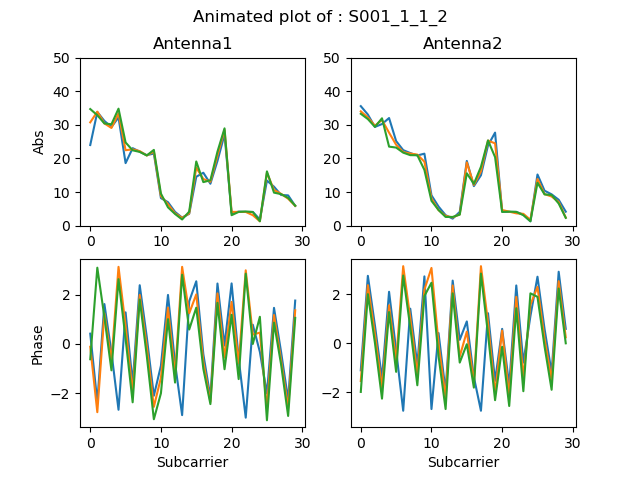

<IPython.core.display.Javascript object>


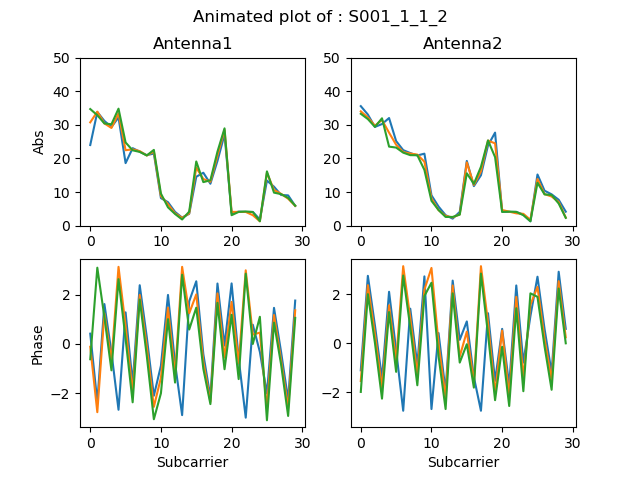

In [3]:
plot_animated(exp_id,arr_scaled)

In [ ]:
arr_scaled.shape